# Analysis of EM training

In [2]:
import numpy as np
import pandas as pd
import re

from induction import *

In [6]:
from pathlib import Path
base_path = Path('../parsing/output')

## Parse EM log

00:32:30.984 [main] INFO  gramr.split.em.Iteration - EM total log likelihood: -191125.65608801664

In [7]:
likelihood_re = re.compile(r'.*EM total log likelihood: ([-\.\d]+)')

In [8]:
likelihoods = []
with open(base_path / 'induce' / 'log.txt') as f:
    for line in f:
        match = likelihood_re.search(line)
        if match:
            likelihoods.append(float(match.group(1)))

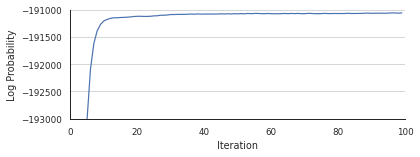

In [24]:
# Print-quality plot of convergence
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme('paper')
sns.set_style('white')
fig, ax = plt.subplots(figsize=(6, 2))
ax.set_xlabel('Iteration')
ax.set_ylabel('Log Probability')
ax.set_xlim(0, 100)
ax.set_ylim(-193000, -191000)
drop=0

sns.despine()
sns.lineplot(x=range(drop,len(likelihoods)), y=likelihoods[drop:])
ax.grid(axis='y')

import tikzplotlib

tikzplotlib.save("fig-em-convergence.tex", axis_width='12cm', axis_height='4cm', extra_axis_parameters=['xmajorticks=true', 'ymajorticks=true'])

plt.show()
